In [13]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from hloc import extract_features, match_features, reconstruction, visualization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup
In this notebook, we will run SfM reconstruction from scratch on a set of images. We choose the [South-Building dataset](https://openaccess.thecvf.com/content_cvpr_2013/html/Hane_Joint_3D_Scene_2013_CVPR_paper.html) - we will download it later. First, we define some paths.

In [14]:
camera_configs = {
    'iphone8plus': {
        'f': 28, 
        'mu_m': 1.22
    },
    'iphone12mini': {
        'f': 26,
        'mu_m': 1.4     
    }
}

In [18]:
dataset_name = 'room'
camera_conf = camera_configs['iphone12mini']

dataset = Path(f'datasets/{dataset_name}/')
images = dataset / 'database/'
query = dataset / 'query'

outputs = Path(f'outputs/{dataset_name}')
sfm_pairs = outputs / 'sfm' 
sfm_dir = sfm_pairs / 'sfm_superpoint+superglue'
pairs = Path(f'pairs/{dataset_name}/')

database_list_path = dataset / 'database_list.txt'
query_list_path = dataset / 'query_list.txt'


local_feature_conf = extract_features.confs['superpoint_inloc']
global_feature_conf = extract_features.confs['netvlad']
matcher_conf = match_features.confs['superglue']

loc_pairs = pairs / f'pair_query_{dataset_name}.txt'

## Extract local features

In [5]:
local_feature_path = extract_features.main(local_feature_conf, images, sfm_pairs)

[12/17/2021 12:31:53 INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 4},
 'output': 'feats-superpoint-n4096-r1600',
 'preprocessing': {'grayscale': True, 'resize_max': 1600}}
[12/17/2021 12:31:53 INFO] Found 58 images in root datasets/room/images.
Loaded SuperPoint model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58/58 [02:22<00:00,  2.46s/it]

[12/17/2021 12:34:16 INFO] Finished exporting features.


## Exhaustive matching
Since the dataset is small, we can match all $\frac{n(n-1)}{2}$ images pairs. To do so, we pass the argument `exhaustive=True` and make sure that the pair file does not exist yet. If your dataset is larger, exhaustive matching might take a long time - consider selecting fewer pairs using image retrieval and `hloc/pairs_from_retrieval.py`.

In [7]:
match_path = match_features.main(
    matcher_conf, sfm_pairs, local_feature_conf['output'], sfm_pairs / 'pairs-exhaustive.txt', exhaustive=True)

[12/17/2021 12:34:41 INFO] Matching local features with configuration:
{'model': {'name': 'superglue', 'sinkhorn_iterations': 50, 'weights': 'indoor'},
 'output': 'matches-superglue'}
[12/17/2021 12:34:41 INFO] Writing exhaustive match pairs to outputs/room/sfm/pairs-exhaustive.txt.
Loaded SuperGlue model ("indoor" weights)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1653/1653 [34:58<00:00,  1.27s/it]

[12/17/2021 13:09:40 INFO] Finished exporting matches.


## SfM reconstruction
Run COLMAP on the features and matches.

In [37]:
#reconstruction.main(sfm_dir, images, sfm_pairs, local_feature_path, match_path, single_camera=True, verbose=True)

[12/17/2021 14:56:37 INFO] Creating an empty database...
[12/17/2021 14:56:37 INFO] Importing images into the database...

Feature import

Processing file [1/58]
  Features:       0
Processing file [2/58]
  Features:       0
Processing file [3/58]
  Features:       0
Processing file [4/58]
  Features:       0
Processing file [5/58]
  Features:       0
Processing file [6/58]
  Features:       0
Processing file [7/58]
  Features:       0
Processing file [8/58]
  Features:       0
Processing file [9/58]
  Features:       0
Processing file [10/58]
  Features:       0
Processing file [11/58]
  Features:       0
Processing file [12/58]
  Features:       0
Processing file [13/58]
  Features:       0
Processing file [14/58]
  Features:       0
Processing file [15/58]
  Features:       0
Processing file [16/58]
  Features:       0
Processing file [17/58]
  Features:       0
Processing file [18/58]
  Features:       0
Processing file [19/58]
  Features:       0
Processing file [20/58]
  Features

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<00:00, 4129.37it/s]

[12/17/2021 14:56:41 INFO] Importing matches into the database...



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1653/1653 [00:00<00:00, 5114.65it/s]

[12/17/2021 14:56:41 INFO] Performing geometric verification of the matches...



Custom feature matching

Matching block [1/17] in 2.002s
Matching block [2/17] in 1.715s
Matching block [3/17] in 2.156s
Matching block [4/17] in 1.763s
Matching block [5/17] in 2.076s
Matching block [6/17] in 2.044s
Matching block [7/17] in 1.279s
Matching block [8/17] in 2.007s
Matching block [9/17] in 2.311s
Matching block [10/17] in 2.499s
Matching block [11/17] in 1.768s
Matching block [12/17] in 1.292s
Matching block [13/17] in 2.068s
Matching block [14/17] in 1.700s
Matching block [15/17] in 2.082s
Matching block [16/17] in 1.371s
Matching block [17/17] in 1.072s
Elapsed time: 0.520 [minutes]
[12/17/2021 14:57:13 INFO] Running the reconstruction with command:
colmap mapper --database_path outputs/room/sfm/sfm_superpoint+superglue/database.db --image_path datasets/room/images --output_path outputs/room/sfm/sfm_superpoint+superglue/models --Mapper.num_threads 8

Loading database

Loading cameras... 1 in 0.000s
Loading matches... 445 in 0.001s
Loading images... 58 in 0.002s (conne


Initializing with image pair #14 and #27


Global bundle adjustment

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  5.972645e+02    0.00e+00    3.76e+04   0.00e+00   0.00e+00  1.00e+04        0    1.71e-04    4.83e-04
   1  4.559898e+02    1.41e+02    2.95e+04   4.65e-01   1.00e+00  3.00e+04        1    3.39e-04    8.70e-04
   2  4.522072e+02    3.78e+00    1.28e+04   5.11e+00   8.85e-01  5.51e+04        1    3.04e-04    1.20e-03
   3  4.505758e+02    1.63e+00    9.30e+03   1.02e+00   8.63e-01  8.93e+04        1    2.94e-04    1.52e-03
   4  4.499948e+02    5.81e-01    3.05e+03   2.66e+00   9.34e-01  2.58e+05        1    2.86e-04    1.83e-03
   5  4.499016e+02    9.31e-02    7.44e+02   1.90e+00   9.50e-01  7.73e+05        1    2.87e-04    2.14e-03
   6  4.498978e+02    3.86e-03    1.66e+01   4.53e-01   9.88e-01  2.32e+06        1    3.05e-04    2.47e-03
   7  4.498978e+02    9.30e-06    1.01e-01   4.03e-02   1.04e+00  


Bundle adjustment report
------------------------
    Residuals : 8036
   Parameters : 4054
   Iterations : 26
         Time : 0.149973 [s]
 Initial cost : 0.97383 [px]
   Final cost : 0.879213 [px]
  Termination : No convergence

  => Merged observations: 8
  => Completed observations: 17
  => Filtered observations: 496
  => Changed observations: 0.129667

Bundle adjustment report
------------------------
    Residuals : 7048
   Parameters : 3787
   Iterations : 9
         Time : 0.0422801 [s]
 Initial cost : 0.838449 [px]
   Final cost : 0.771124 [px]
  Termination : Convergence

  => Merged observations: 4
  => Completed observations: 121
  => Filtered observations: 6
  => Changed observations: 0.037174

Retriangulation

  => Merged observations: 6
  => Completed observations: 0
  => Retriangulated observations: 0

Global bundle adjustment

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  4.497945e+03    0.00e+00    4


Registering image #24 (8)

  => Image sees 303 / 1173 points

Pose refinement report
----------------------
    Residuals : 136
   Parameters : 6
   Iterations : 22
         Time : 0.00170324 [s]
 Initial cost : 0.923057 [px]
   Final cost : 0.893576 [px]
  Termination : Convergence

  => Continued observations: 67
  => Added observations: 719

Bundle adjustment report
------------------------
    Residuals : 9192
   Parameters : 3553
   Iterations : 26
         Time : 0.124467 [s]
 Initial cost : 1.23019 [px]
   Final cost : 1.0087 [px]
  Termination : No convergence

  => Merged observations: 0
  => Completed observations: 25
  => Filtered observations: 611
  => Changed observations: 0.138381

Bundle adjustment report
------------------------
    Residuals : 8010
   Parameters : 3208
   Iterations : 3
         Time : 0.016897 [s]
 Initial cost : 0.828137 [px]
   Final cost : 0.767443 [px]
  Termination : Convergence

  => Merged observations: 0
  => Completed observations: 121
  => 


Bundle adjustment report
------------------------
    Residuals : 9342
   Parameters : 3403
   Iterations : 26
         Time : 0.359533 [s]
 Initial cost : 1.16437 [px]
   Final cost : 0.997188 [px]
  Termination : No convergence

  => Merged observations: 0
  => Completed observations: 32
  => Filtered observations: 598
  => Changed observations: 0.134875

Bundle adjustment report
------------------------
    Residuals : 8216
   Parameters : 3082
   Iterations : 3
         Time : 0.0189419 [s]
 Initial cost : 0.819282 [px]
   Final cost : 0.762428 [px]
  Termination : Convergence

  => Merged observations: 0
  => Completed observations: 142
  => Filtered observations: 3
  => Changed observations: 0.035297

Retriangulation

  => Merged observations: 7
  => Completed observations: 0
  => Retriangulated observations: 137

Global bundle adjustment

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  9.404384e+04    0.00e+00   

   4  7.351930e+03    1.35e-03    1.83e+00   5.63e-02   1.00e+00  8.10e+05        1    1.52e-02    4.80e-02
   5  7.351930e+03    4.54e-06    1.09e-01   3.42e-03   1.02e+00  2.43e+06        1    7.30e-03    5.55e-02


Bundle adjustment report
------------------------
    Residuals : 11934
   Parameters : 6325
   Iterations : 6
         Time : 0.0558249 [s]
 Initial cost : 0.793248 [px]
   Final cost : 0.784888 [px]
  Termination : Convergence

  => Merged observations: 15
  => Completed observations: 0
  => Filtered observations: 6
  => Changed observations: 0.003519

Global bundle adjustment

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  7.401405e+03    0.00e+00    5.41e+03   0.00e+00   0.00e+00  1.00e+04        0    2.97e-03    9.51e-03
   1  7.346825e+03    5.46e+01    4.68e+01   2.49e-01   1.00e+00  3.00e+04        1    7.73e-03    1.73e-02
   2  7.346684e+03    1.41e-01    3.89e+01   3.54e-01   1.00e+00  9.00e+04 


Bundle adjustment report
------------------------
    Residuals : 9672
   Parameters : 3865
   Iterations : 26
         Time : 0.189027 [s]
 Initial cost : 1.09721 [px]
   Final cost : 0.978502 [px]
  Termination : No convergence

  => Merged observations: 0
  => Completed observations: 29
  => Filtered observations: 714
  => Changed observations: 0.153639

Bundle adjustment report
------------------------
    Residuals : 8088
   Parameters : 3247
   Iterations : 4
         Time : 0.0192861 [s]
 Initial cost : 0.846997 [px]
   Final cost : 0.791203 [px]
  Termination : Convergence

  => Merged observations: 0
  => Completed observations: 128
  => Filtered observations: 3
  => Changed observations: 0.032394

Registering image #17 (13)

  => Image sees 278 / 959 points

Pose refinement report
----------------------
    Residuals : 368
   Parameters : 6
   Iterations : 31
         Time : 0.00613279 [s]
 Initial cost : 0.935927 [px]
   Final cost : 0.900353 [px]
  Termination : Convergenc

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  8.162807e+03    0.00e+00    2.27e+03   0.00e+00   0.00e+00  1.00e+04        0    3.84e-03    1.38e-02
   1  8.130926e+03    3.19e+01    3.23e+01   2.48e-01   1.00e+00  3.00e+04        1    9.05e-03    2.30e-02
   2  8.130807e+03    1.18e-01    3.23e+00   4.96e-02   1.08e+00  9.00e+04        1    8.37e-03    3.15e-02
   3  8.130804e+03    3.69e-03    1.46e+00   3.78e-02   1.09e+00  2.70e+05        1    7.26e-03    3.88e-02
   4  8.130804e+03    8.04e-05    7.15e-01   7.12e-03   1.09e+00  8.10e+05        1    7.66e-03    4.66e-02


Bundle adjustment report
------------------------
    Residuals : 13440
   Parameters : 7135
   Iterations : 5
         Time : 0.0468939 [s]
 Initial cost : 0.779328 [px]
   Final cost : 0.777799 [px]
  Termination : Convergence

  => Merged observations: 4
  => Completed observations: 0
  => Filtered observations: 0
  => Changed observations: 0.00

   5  8.623747e+03    1.50e-05    3.64e-01   3.38e-03   1.01e+00  2.43e+06        1    1.88e-02    6.94e-02


Bundle adjustment report
------------------------
    Residuals : 14088
   Parameters : 7447
   Iterations : 6
         Time : 0.0702702 [s]
 Initial cost : 0.791493 [px]
   Final cost : 0.78239 [px]
  Termination : Convergence

  => Merged observations: 20
  => Completed observations: 0
  => Filtered observations: 7
  => Changed observations: 0.003833

Global bundle adjustment

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  8.706276e+03    0.00e+00    7.47e+03   0.00e+00   0.00e+00  1.00e+04        0    3.53e-03    1.14e-02
   1  8.637249e+03    6.90e+01    4.43e+01   1.68e-01   1.00e+00  3.00e+04        1    1.18e-02    2.33e-02
   2  8.637181e+03    6.76e-02    8.11e+00   1.22e-01   1.02e+00  9.00e+04        1    1.12e-02    3.46e-02
   3  8.637176e+03    5.70e-03    2.31e+00   5.81e-02   1.01e+00  2.70e+05  

   5  9.965191e+03    5.89e-04    1.95e+00   1.63e-02   1.01e+00  2.43e+06        1    2.20e-02    7.64e-02
   6  9.965191e+03    1.30e-06    8.54e-01   7.39e-04   1.06e+00  7.29e+06        1    1.29e-02    8.95e-02


Bundle adjustment report
------------------------
    Residuals : 15618
   Parameters : 8647
   Iterations : 7
         Time : 0.089873 [s]
 Initial cost : 0.820315 [px]
   Final cost : 0.798785 [px]
  Termination : Convergence

  => Merged observations: 55
  => Completed observations: 0
  => Filtered observations: 28
  => Changed observations: 0.010629

Global bundle adjustment

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  1.008597e+04    0.00e+00    2.63e+04   0.00e+00   0.00e+00  1.00e+04        0    4.30e-03    1.64e-02
   1  9.863458e+03    2.23e+02    2.54e+02   1.26e+00   1.00e+00  3.00e+04        1    2.12e-02    3.78e-02
   2  9.862302e+03    1.16e+00    1.83e+02   3.09e-01   1.00e+00  9.00e+04 

   4  9.952053e+03    3.42e-01    1.41e+02   3.71e-01   1.00e+00  8.10e+05        1    3.26e-02    1.44e-01
   5  9.952049e+03    3.65e-03    2.06e+00   3.47e-02   1.01e+00  2.43e+06        1    2.08e-02    1.65e-01
   6  9.952049e+03    7.29e-06    1.31e-01   1.52e-03   1.02e+00  7.29e+06        1    1.31e-02    1.78e-01


Bundle adjustment report
------------------------
    Residuals : 16248
   Parameters : 8923
   Iterations : 7
         Time : 0.178651 [s]
 Initial cost : 0.904744 [px]
   Final cost : 0.78263 [px]
  Termination : Convergence

  => Merged observations: 170
  => Completed observations: 8
  => Filtered observations: 20
  => Changed observations: 0.024372

Global bundle adjustment

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  1.058204e+04    0.00e+00    3.30e+04   0.00e+00   0.00e+00  1.00e+04        0    4.10e-03    1.36e-02
   1  1.024484e+04    3.37e+02    7.01e+02   1.11e+00   1.00e+00  3.00e+04 

   4  1.194875e+05    5.76e+01    4.70e+03   1.68e+00   1.02e+00  5.43e+05        1    7.64e-02    1.41e-01
   5  1.194842e+05    3.35e+00    3.89e+02   7.71e-01   9.20e-01  1.33e+06        1    1.59e-02    1.57e-01
   6  1.194838e+05    3.68e-01    7.46e+01   1.35e-01   7.80e-01  1.61e+06        1    2.36e-02    1.81e-01
   7  1.194837e+05    6.14e-02    6.60e+01   8.18e-02   6.94e-01  1.71e+06        1    1.33e-02    1.95e-01
   8  1.194837e+05    1.15e-02    1.70e+01   3.85e-02   6.46e-01  1.76e+06        1    1.56e-02    2.10e-01
   9  1.194837e+05    2.31e-03    1.32e+01   1.59e-02   6.16e-01  1.78e+06        1    1.23e-02    2.23e-01
  10  1.194837e+05    4.73e-04    4.18e+00   8.74e-03   5.94e-01  1.79e+06        1    1.64e-02    2.40e-01
  11  1.194837e+05    9.93e-05    2.74e+00   3.47e-03   5.79e-01  1.80e+06        1    1.50e-02    2.55e-01
  12  1.194837e+05    2.10e-05    1.96e+00   1.90e-03   5.68e-01  1.80e+06        1    1.58e-02    2.71e-01
  13  1.194837e+05    4.50e-


Registering image #40 (24)

  => Image sees 257 / 665 points

Pose refinement report
----------------------
    Residuals : 448
   Parameters : 6
   Iterations : 10
         Time : 0.00366663 [s]
 Initial cost : 0.804676 [px]
   Final cost : 0.792996 [px]
  Termination : Convergence

  => Continued observations: 221
  => Added observations: 368

Bundle adjustment report
------------------------
    Residuals : 3768
   Parameters : 1474
   Iterations : 26
         Time : 0.070067 [s]
 Initial cost : 0.982093 [px]
   Final cost : 0.927634 [px]
  Termination : No convergence

  => Merged observations: 0
  => Completed observations: 9
  => Filtered observations: 211
  => Changed observations: 0.116773

Bundle adjustment report
------------------------
    Residuals : 3352
   Parameters : 1351
   Iterations : 6
         Time : 0.01541 [s]
 Initial cost : 0.840537 [px]
   Final cost : 0.794843 [px]
  Termination : Convergence

  => Merged observations: 0
  => Completed observations: 65
  =>

   2  1.250570e+04    5.55e-02    6.63e+00   8.38e-02   1.02e+00  9.00e+04        1    1.10e-01    2.01e-01
   3  1.250570e+04    3.31e-03    2.20e+00   4.10e-02   1.00e+00  2.70e+05        1    3.19e-02    2.33e-01
   4  1.250570e+04    1.74e-04    1.04e+00   1.07e-02   1.00e+00  8.10e+05        1    2.23e-02    2.56e-01
   5  1.250570e+04    1.08e-05    3.28e-01   5.24e-03   9.93e-01  2.43e+06        1    1.68e-02    2.73e-01


Bundle adjustment report
------------------------
    Residuals : 19750
   Parameters : 10378
   Iterations : 6
         Time : 0.273303 [s]
 Initial cost : 0.797472 [px]
   Final cost : 0.795739 [px]
  Termination : Convergence

  => Merged observations: 7
  => Completed observations: 7
  => Filtered observations: 0
  => Changed observations: 0.001418
  => Filtered images: 0

Registering image #54 (25)

  => Image sees 189 / 571 points

Pose refinement report
----------------------
    Residuals : 226
   Parameters : 6
   Iterations : 25
         Time : 0.004

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  1.235500e+04    0.00e+00    1.73e+04   0.00e+00   0.00e+00  1.00e+04        0    5.43e-03    1.92e-02
   1  1.215160e+04    2.03e+02    2.03e+02   6.31e-01   1.00e+00  3.00e+04        1    1.80e-02    3.72e-02
   2  1.214985e+04    1.75e+00    1.19e+02   4.40e-01   1.02e+00  9.00e+04        1    2.53e-02    6.27e-02
   3  1.214945e+04    4.03e-01    5.93e+01   3.64e-01   1.01e+00  2.70e+05        1    2.28e-02    8.56e-02
   4  1.214941e+04    3.50e-02    1.23e+01   1.34e-01   1.01e+00  8.10e+05        1    2.00e-02    1.06e-01
   5  1.214941e+04    6.10e-04    1.86e+00   1.88e-02   1.03e+00  2.43e+06        1    2.80e-02    1.34e-01
   6  1.214941e+04    3.20e-06    1.66e-01   1.13e-03   1.06e+00  7.29e+06        1    2.51e-02    1.59e-01


Bundle adjustment report
------------------------
    Residuals : 19604
   Parameters : 10333
   Iterations : 7
         Time : 0.1599

  11  2.308855e+05    2.66e-03    9.44e+00   5.25e-03   1.34e+00  1.77e+09        1    2.09e-02    2.43e-01
  12  2.308855e+05    6.84e-04    2.16e+00   2.12e-03   1.31e+00  5.31e+09        1    1.74e-02    2.61e-01
  13  2.308855e+05    1.76e-04    2.55e+00   1.41e-03   1.28e+00  1.59e+10        1    1.63e-02    2.77e-01
  14  2.308855e+05    4.56e-05    1.58e+00   5.61e-04   1.25e+00  4.78e+10        1    1.85e-02    2.96e-01
  15  2.308855e+05    1.18e-05    1.78e+00   3.83e-04   1.22e+00  1.43e+11        1    1.66e-02    3.13e-01
  16  2.308855e+05    3.07e-06    4.08e-01   1.51e-04   1.18e+00  4.30e+11        1    1.75e-02    3.30e-01


Bundle adjustment report
------------------------
    Residuals : 24168
   Parameters : 12430
   Iterations : 17
         Time : 0.331108 [s]
 Initial cost : 8.02336 [px]
   Final cost : 3.09085 [px]
  Termination : Convergence

  => Merged observations: 130
  => Completed observations: 21
  => Filtered observations: 1682
  => Changed observations:


Bundle adjustment report
------------------------
    Residuals : 3834
   Parameters : 1789
   Iterations : 26
         Time : 0.132476 [s]
 Initial cost : 1.16958 [px]
   Final cost : 1.022 [px]
  Termination : No convergence

  => Merged observations: 0
  => Completed observations: 30
  => Filtered observations: 333
  => Changed observations: 0.189358

Bundle adjustment report
------------------------
    Residuals : 3200
   Parameters : 1573
   Iterations : 4
         Time : 0.00876725 [s]
 Initial cost : 0.857298 [px]
   Final cost : 0.793134 [px]
  Termination : Convergence

  => Merged observations: 0
  => Completed observations: 62
  => Filtered observations: 1
  => Changed observations: 0.039375

Retriangulation

  => Merged observations: 41
  => Completed observations: 6
  => Retriangulated observations: 1126

Global bundle adjustment

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  1.398537e+06    0.00e+00    

  => Filtered observations: 8
  => Changed observations: 0.002272
  => Filtered images: 0

Registering image #31 (33)

  => Image sees 271 / 995 points

Pose refinement report
----------------------
    Residuals : 134
   Parameters : 6
   Iterations : 29
         Time : 0.00270156 [s]
 Initial cost : 0.9314 [px]
   Final cost : 0.863013 [px]
  Termination : Convergence

  => Continued observations: 66
  => Added observations: 1242

Bundle adjustment report
------------------------
    Residuals : 9058
   Parameters : 4027
   Iterations : 26
         Time : 0.166216 [s]
 Initial cost : 1.39817 [px]
   Final cost : 1.08917 [px]
  Termination : No convergence

  => Merged observations: 4
  => Completed observations: 63
  => Filtered observations: 762
  => Changed observations: 0.183043

Bundle adjustment report
------------------------
    Residuals : 7612
   Parameters : 3484
   Iterations : 4
         Time : 0.0222727 [s]
 Initial cost : 0.909187 [px]
   Final cost : 0.847224 [px]
  Te

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  1.822986e+04    0.00e+00    1.87e+05   0.00e+00   0.00e+00  1.00e+04        0    1.05e-02    3.41e-02
   1  1.537570e+04    2.85e+03    5.83e+04   5.44e+00   9.92e-01  3.00e+04        1    2.42e-02    5.84e-02
   2  1.527897e+04    9.67e+01    4.40e+03   2.04e+00   1.01e+00  9.00e+04        1    2.16e-02    8.02e-02
   3  1.526946e+04    9.51e+00    1.31e+03   1.10e+00   1.02e+00  2.70e+05        1    2.14e-02    1.02e-01
   4  1.526863e+04    8.29e-01    2.98e+02   5.97e-01   1.03e+00  8.10e+05        1    4.17e-02    1.44e-01
   5  1.526861e+04    2.20e-02    7.01e+00   9.73e-02   1.09e+00  2.43e+06        1    2.54e-02    1.70e-01
   6  1.526861e+04    5.40e-04    1.98e+00   7.43e-03   1.21e+00  7.29e+06        1    2.46e-02    1.95e-01
   7  1.526861e+04    2.66e-05    1.95e+00   7.59e-04   1.23e+00  2.19e+07        1    2.23e-02    2.17e-01
   8  1.526861e+04    1.42e-


Bundle adjustment report
------------------------
    Residuals : 6286
   Parameters : 2095
   Iterations : 26
         Time : 0.138607 [s]
 Initial cost : 1.23074 [px]
   Final cost : 1.08389 [px]
  Termination : No convergence

  => Merged observations: 5
  => Completed observations: 20
  => Filtered observations: 539
  => Changed observations: 0.179446

Bundle adjustment report
------------------------
    Residuals : 5276
   Parameters : 1726
   Iterations : 4
         Time : 0.0162795 [s]
 Initial cost : 0.854377 [px]
   Final cost : 0.800342 [px]
  Termination : Convergence

  => Merged observations: 10
  => Completed observations: 116
  => Filtered observations: 4
  => Changed observations: 0.049280

Retriangulation

  => Merged observations: 26
  => Completed observations: 0
  => Retriangulated observations: 414

Global bundle adjustment

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  7.483739e+05    0.00e+00  


Bundle adjustment report
------------------------
    Residuals : 7080
   Parameters : 2518
   Iterations : 26
         Time : 0.164682 [s]
 Initial cost : 1.44216 [px]
   Final cost : 1.34642 [px]
  Termination : No convergence

  => Merged observations: 0
  => Completed observations: 33
  => Filtered observations: 702
  => Changed observations: 0.207627

Bundle adjustment report
------------------------
    Residuals : 6384
   Parameters : 2278
   Iterations : 4
         Time : 0.0159059 [s]
 Initial cost : 0.873841 [px]
   Final cost : 0.831244 [px]
  Termination : Convergence

  => Merged observations: 5
  => Completed observations: 102
  => Filtered observations: 4
  => Changed observations: 0.034774

Registering image #58 (39)

  => Image sees 114 / 309 points

Pose refinement report
----------------------
    Residuals : 82
   Parameters : 6
   Iterations : 16
         Time : 0.00123946 [s]
 Initial cost : 0.908434 [px]
   Final cost : 0.876152 [px]
  Termination : Convergence


  32  6.542747e+05    8.58e-02    2.06e+02   8.66e-02   2.34e-01  9.76e+03        1    2.61e-02    8.29e-01
  33  6.542747e+05    5.14e-02    1.51e+02   5.61e-02   2.53e-01  8.71e+03        1    3.40e-02    8.63e-01
  34  6.542746e+05    2.83e-02    1.08e+02   3.93e-02   2.63e-01  7.88e+03        1    2.28e-02    8.86e-01
  35  6.542746e+05    1.51e-02    7.66e+01   2.48e-02   2.77e-01  7.24e+03        1    2.49e-02    9.11e-01
  36  6.542746e+05    7.65e-03    5.25e+01   1.73e-02   2.85e-01  6.71e+03        1    2.29e-02    9.35e-01
  37  6.542746e+05    3.77e-03    3.63e+01   1.06e-02   2.96e-01  6.28e+03        1    2.49e-02    9.60e-01
  38  6.542746e+05    1.78e-03    2.41e+01   7.37e-03   3.02e-01  5.92e+03        1    2.80e-02    9.88e-01
  39  6.542746e+05    8.23e-04    1.63e+01   4.35e-03   3.12e-01  5.62e+03        1    2.37e-02    1.01e+00
  40  6.542746e+05    3.68e-04    1.05e+01   3.08e-03   3.16e-01  5.35e+03        1    2.33e-02    1.04e+00
  41  6.542746e+05    1.61e-


Bundle adjustment report
------------------------
    Residuals : 8858
   Parameters : 3286
   Iterations : 26
         Time : 0.136361 [s]
 Initial cost : 1.07691 [px]
   Final cost : 1.00049 [px]
  Termination : No convergence

  => Merged observations: 0
  => Completed observations: 28
  => Filtered observations: 430
  => Changed observations: 0.103409

Bundle adjustment report
------------------------
    Residuals : 8606
   Parameters : 3151
   Iterations : 3
         Time : 0.0139727 [s]
 Initial cost : 0.910614 [px]
   Final cost : 0.875202 [px]
  Termination : Convergence

  => Merged observations: 0
  => Completed observations: 79
  => Filtered observations: 2
  => Changed observations: 0.018824

Registering image #6 (43)

  => Image sees 67 / 510 points

Pose refinement report
----------------------
    Residuals : 64
   Parameters : 6
   Iterations : 35
         Time : 0.00160546 [s]
 Initial cost : 0.916865 [px]
   Final cost : 0.88074 [px]
  Termination : Convergence

  =

  20  6.024223e+05    2.02e+00    2.75e+01   7.94e+02   8.01e-01  5.68e+05        1    3.44e-02    7.05e-01
  21  6.024207e+05    1.63e+00    1.98e+01   1.01e+03   7.99e-01  7.23e+05        1    2.61e-02    7.31e-01
  22  6.024194e+05    1.30e+00    1.44e+01   1.29e+03   7.98e-01  9.18e+05        1    2.71e-02    7.58e-01
  23  6.024183e+05    1.04e+00    1.04e+01   1.64e+03   7.98e-01  1.16e+06        1    2.61e-02    7.85e-01
  24  6.024175e+05    8.30e-01    7.54e+00   2.07e+03   7.97e-01  1.47e+06        1    2.55e-02    8.10e-01
  25  6.024168e+05    6.61e-01    5.85e+00   2.63e+03   7.97e-01  1.86e+06        1    2.57e-02    8.36e-01
  26  6.024163e+05    5.20e-01    4.41e+00   3.11e+03   7.99e-01  2.37e+06        1    4.62e-02    8.83e-01
  27  6.024159e+05    3.93e-01    3.27e+00   3.15e+03   8.07e-01  3.08e+06        1    3.57e-02    9.20e-01
  28  6.024156e+05    2.93e-01    2.54e+00   2.97e+03   8.15e-01  4.11e+06        1    6.98e-02    9.90e-01
  29  6.024154e+05    2.36e-


Bundle adjustment report
------------------------
    Residuals : 11526
   Parameters : 4747
   Iterations : 26
         Time : 0.205728 [s]
 Initial cost : 1.03773 [px]
   Final cost : 0.932422 [px]
  Termination : No convergence

  => Merged observations: 0
  => Completed observations: 45
  => Filtered observations: 503
  => Changed observations: 0.095089

Bundle adjustment report
------------------------
    Residuals : 10610
   Parameters : 4441
   Iterations : 3
         Time : 0.0216719 [s]
 Initial cost : 0.875816 [px]
   Final cost : 0.837452 [px]
  Termination : Convergence

  => Merged observations: 6
  => Completed observations: 93
  => Filtered observations: 1
  => Changed observations: 0.018850

Registering image #28 (48)

  => Image sees 184 / 295 points

Pose refinement report
----------------------
    Residuals : 208
   Parameters : 6
   Iterations : 57
         Time : 0.00809828 [s]
 Initial cost : 0.95299 [px]
   Final cost : 0.847163 [px]
  Termination : Convergenc

   1  1.846317e+04    1.00e+04    6.73e+04   7.15e+00   9.71e-01  3.00e+04        1    3.68e-02    6.74e-02
   2  1.783896e+04    6.24e+02    3.21e+04   6.62e+00   9.28e-01  8.08e+04        1    2.35e-02    9.10e-02
   3  1.773633e+04    1.03e+02    2.38e+04   4.40e+00   8.99e-01  1.64e+05        1    2.75e-02    1.19e-01
   4  1.771030e+04    2.60e+01    5.13e+03   2.17e+00   9.92e-01  4.93e+05        1    2.31e-02    1.42e-01
   5  1.770776e+04    2.55e+00    1.09e+03   9.87e-01   1.00e+00  1.48e+06        1    2.28e-02    1.65e-01
   6  1.770766e+04    9.31e-02    4.75e+01   1.98e-01   1.02e+00  4.44e+06        1    2.09e-02    1.86e-01
   7  1.770766e+04    6.94e-04    1.91e+00   1.66e-02   1.07e+00  1.33e+07        1    2.02e-02    2.07e-01
   8  1.770766e+04    1.16e-05    8.66e-01   1.06e-03   1.23e+00  3.99e+07        1    2.08e-02    2.27e-01


Bundle adjustment report
------------------------
    Residuals : 28002
   Parameters : 15688
   Iterations : 9
         Time : 0.2286

  => Completed observations: 0
  => Retriangulated observations: 2128

Global bundle adjustment

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  1.884133e+06    0.00e+00    8.63e+06   0.00e+00   0.00e+00  1.00e+04        0    8.78e-03    3.89e-02

CHOLMOD version 3.0.14, Oct 22, 2019: Symbolic Analysis: status: OK
  Architecture: Linux
    sizeof(int):      4
    sizeof(SuiteSparse_long):  8
    sizeof(void *):   8
    sizeof(double):   8
    sizeof(Int):      4 (CHOLMOD's basic integer)
    sizeof(BLAS_INT): 4 (integer used in the BLAS)
  Results from most recent analysis:
    Cholesky flop count: 2.7876e+06
    Nonzeros in L:       27229
  memory blocks in use:          11
  memory in use (MB):           0.0
  peak memory usage (MB):       0.1
  maxrank:    update/downdate rank:   8
  supernodal control: 1 40 (supernodal if flops/lnz >= 40)
  nmethods:   number of ordering methods to try: 1
    method 0: natural
      

   4  1.815568e+04    1.42e+01    2.70e+04   1.17e+00   3.84e-01  4.44e+04        1    8.21e-02    1.97e-01
   5  1.813096e+04    2.47e+01    1.71e+04   6.30e-01   7.20e-01  4.86e+04        1    1.04e-01    3.01e-01
   6  1.811921e+04    1.17e+01    1.30e+04   4.32e-01   6.80e-01  5.10e+04        1    3.14e-02    3.33e-01
   7  1.811053e+04    8.67e+00    9.07e+03   3.00e-01   7.71e-01  6.06e+04        1    2.76e-02    3.60e-01
   8  1.810504e+04    5.49e+00    8.48e+03   2.52e-01   7.08e-01  6.53e+04        1    2.15e-02    3.82e-01
   9  1.809988e+04    5.17e+00    6.83e+03   2.05e-01   7.80e-01  7.93e+04        1    3.06e-02    4.13e-01
  10  1.809598e+04    3.90e+00    7.56e+03   2.02e-01   6.88e-01  8.37e+04        1    2.83e-02    4.41e-01
  11  1.809189e+04    4.08e+00    6.37e+03   1.76e-01   7.69e-01  9.91e+04        1    2.12e-02    4.63e-01
  12  1.808877e+04    3.12e+00    7.14e+03   1.80e-01   6.75e-01  1.04e+05        1    2.52e-02    4.88e-01
  13  1.808548e+04    3.29e+

  18  1.807892e+04    2.23e-01    1.98e+03   5.18e-02   7.22e-01  3.32e+05        1    3.03e-02    6.86e-01
  19  1.807873e+04    1.88e-01    1.78e+03   4.94e-02   7.30e-01  3.68e+05        1    3.15e-02    7.17e-01
  20  1.807857e+04    1.55e-01    1.57e+03   4.66e-02   7.39e-01  4.13e+05        1    2.22e-02    7.40e-01
  21  1.807845e+04    1.24e-01    1.35e+03   4.36e-02   7.50e-01  4.73e+05        1    2.25e-02    7.62e-01
  22  1.807836e+04    9.44e-02    1.13e+03   4.01e-02   7.63e-01  5.53e+05        1    2.33e-02    7.86e-01
  23  1.807829e+04    6.84e-02    9.17e+02   3.62e-02   7.78e-01  6.67e+05        1    2.48e-02    8.11e-01
  24  1.807824e+04    4.61e-02    7.04e+02   3.18e-02   7.96e-01  8.41e+05        1    1.15e-01    9.26e-01
  25  1.807821e+04    2.80e-02    5.01e+02   2.70e-02   8.17e-01  1.13e+06        1    6.84e-02    9.94e-01
  26  1.807820e+04    1.46e-02    3.16e+02   2.15e-02   8.44e-01  1.67e+06        1    3.21e-02    1.03e+00
  27  1.807819e+04    5.95e-

   2  1.280034e+05    4.93e+03    4.96e+04   4.26e+00   9.90e-01  9.00e+04        1    7.92e-02    2.07e-01
   3  1.285355e+05   -5.32e+02    0.00e+00   2.13e+00  -1.88e+00  4.50e+04        1    1.71e-02    2.24e-01
   4  1.278509e+05    1.53e+02    6.37e+04   1.72e+00   6.42e-01  4.61e+04        1    2.65e-02    2.51e-01
   5  1.277518e+05    9.91e+01    5.19e+04   6.74e-01   6.37e-01  4.70e+04        1    2.54e-02    2.77e-01
   6  1.276903e+05    6.15e+01    4.23e+04   3.61e-01   6.22e-01  4.77e+04        1    2.69e-02    3.04e-01
   7  1.276473e+05    4.30e+01    3.13e+04   2.38e-01   6.79e-01  5.00e+04        1    2.69e-02    3.31e-01
   8  1.276217e+05    2.56e+01    2.33e+04   1.76e-01   6.97e-01  5.33e+04        1    3.33e-02    3.64e-01
   9  1.276060e+05    1.57e+01    1.66e+04   1.35e-01   7.35e-01  5.94e+04        1    2.70e-02    3.91e-01
  10  1.275970e+05    9.02e+00    1.20e+04   1.08e-01   7.55e-01  6.85e+04        1    3.41e-02    4.25e-01
  11  1.275918e+05    5.20e+

iter      cost      cost_change  |gradient|   |step|    tr_ratio  tr_radius  ls_iter  iter_time  total_time
   0  2.154843e+04    0.00e+00    5.15e+04   0.00e+00   0.00e+00  1.00e+04        0    8.14e-03    3.91e-02

CHOLMOD version 3.0.14, Oct 22, 2019: Symbolic Analysis: status: OK
  Architecture: Linux
    sizeof(int):      4
    sizeof(SuiteSparse_long):  8
    sizeof(void *):   8
    sizeof(double):   8
    sizeof(Int):      4 (CHOLMOD's basic integer)
    sizeof(BLAS_INT): 4 (integer used in the BLAS)
  Results from most recent analysis:
    Cholesky flop count: 2.4004e+06
    Nonzeros in L:       25201
  memory blocks in use:          11
  memory in use (MB):           0.0
  peak memory usage (MB):       0.1
  maxrank:    update/downdate rank:   8
  supernodal control: 1 40 (supernodal if flops/lnz >= 40)
  nmethods:   number of ordering methods to try: 1
    method 0: natural
        flop count: 2.4004e+06
        nnz(L):     25201
  OK
   1  2.085026e+04    6.98e+02    1.09e+0

## Visualization
We visualize some of the registered images, and color their keypoint by visibility, track length, or triangulated depth.

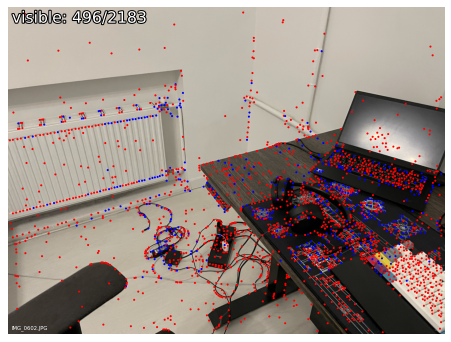

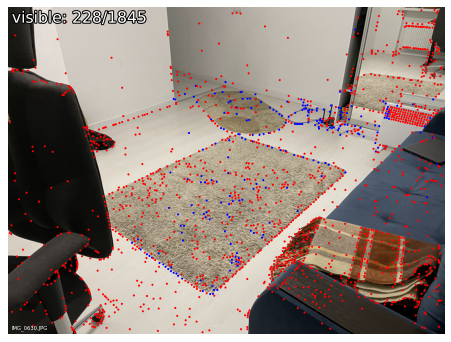

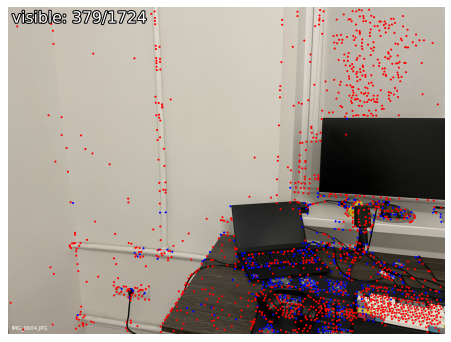

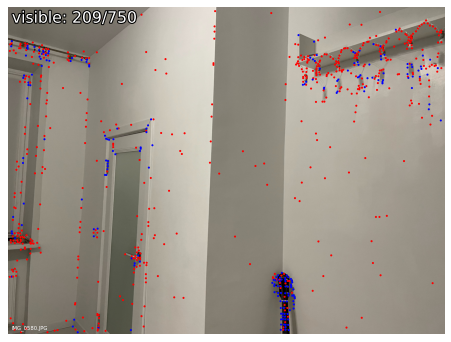

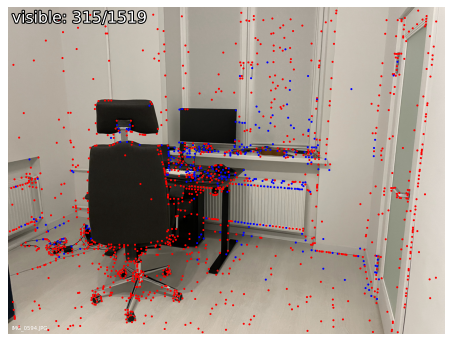

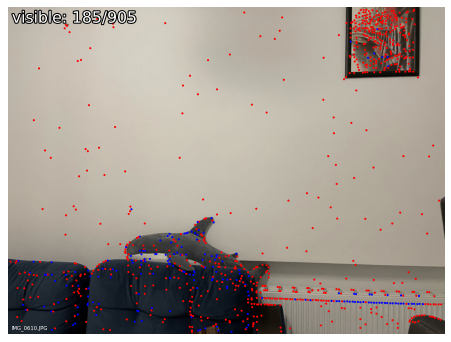

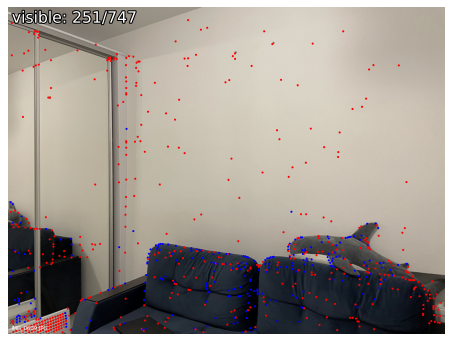

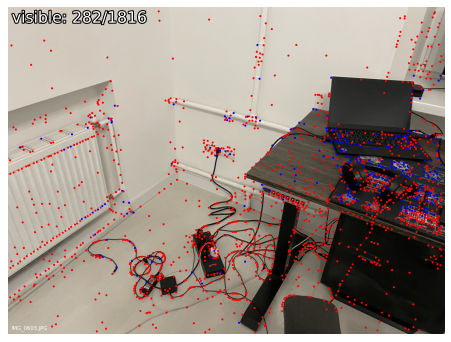

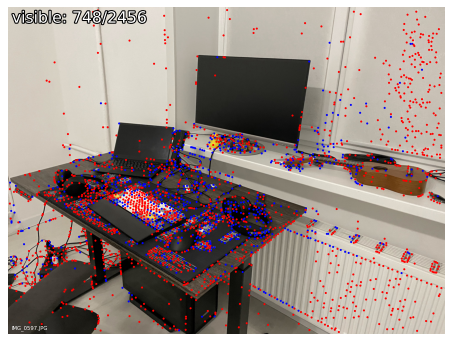

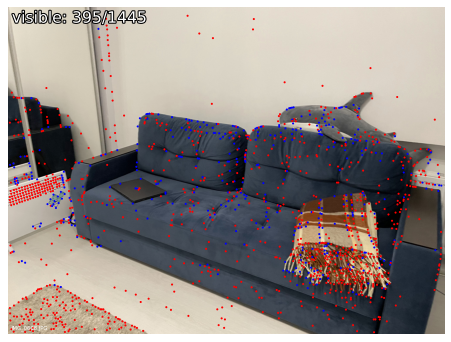

In [39]:
visualization.visualize_sfm_2d(sfm_dir, images, color_by='visibility', n=10)

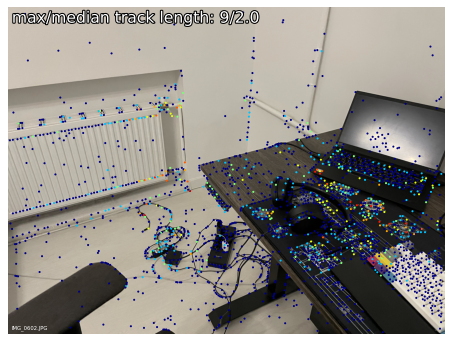

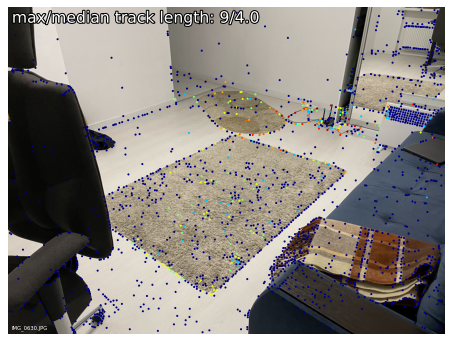

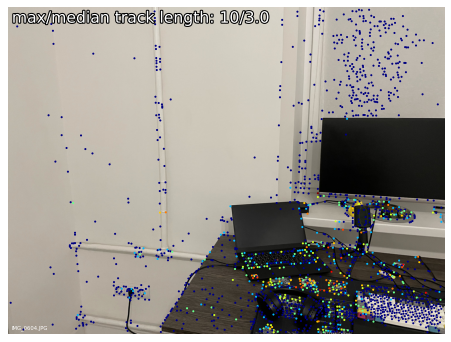

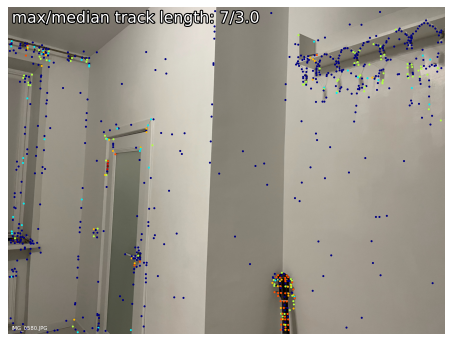

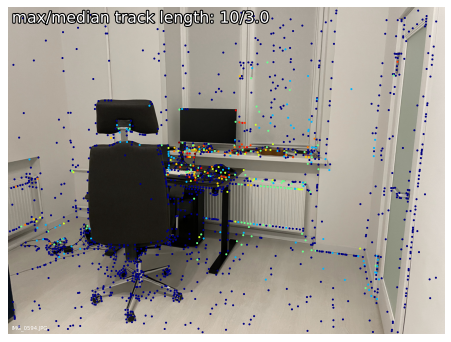

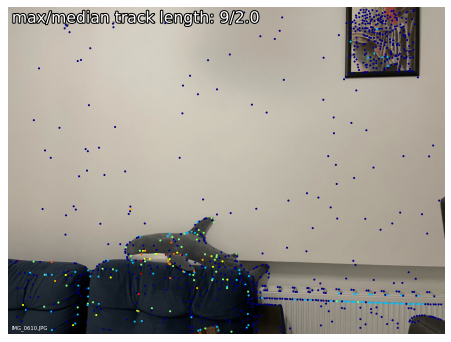

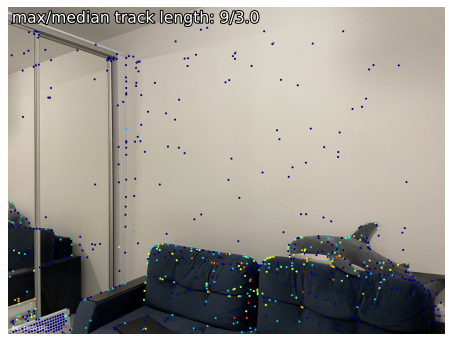

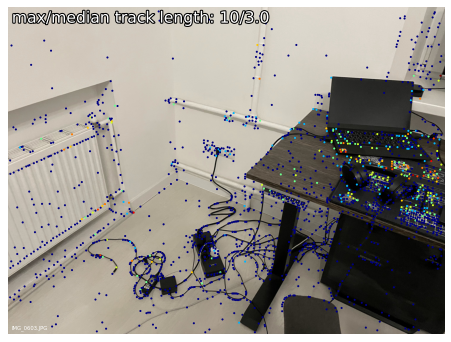

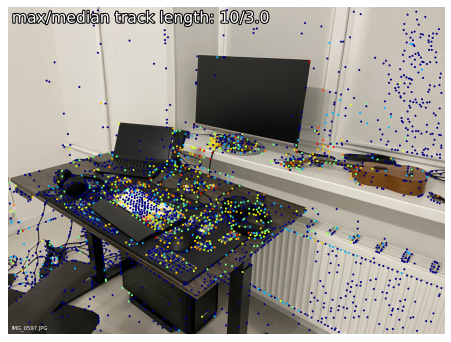

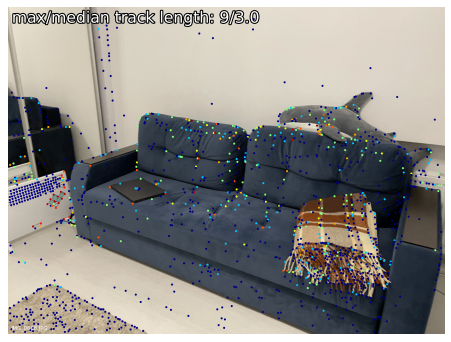

In [40]:
visualization.visualize_sfm_2d(sfm_dir, images, color_by='track_length', n=10)

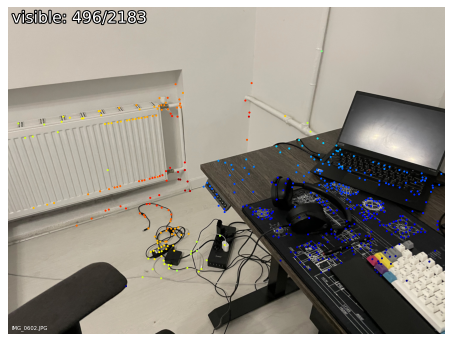

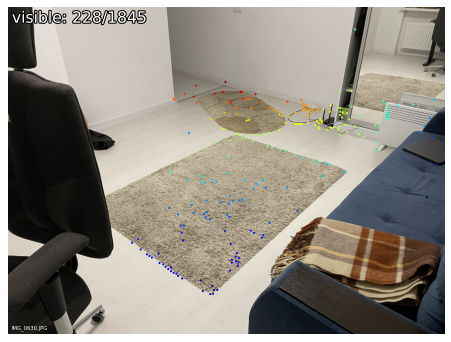

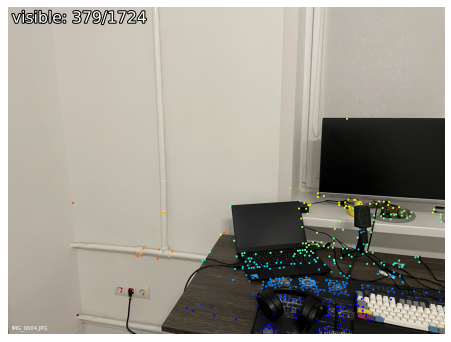

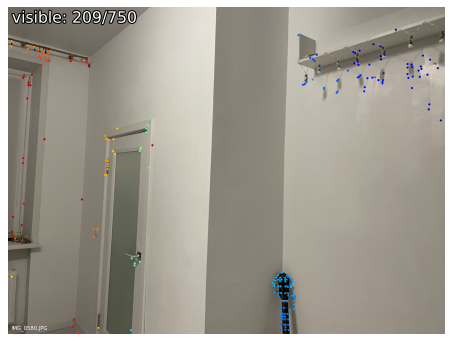

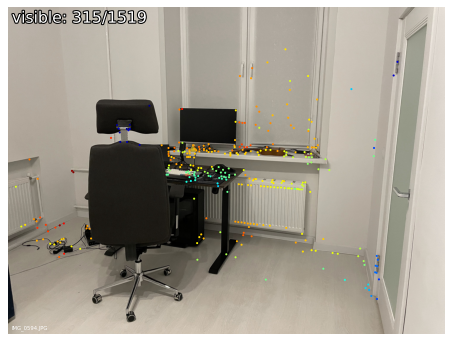

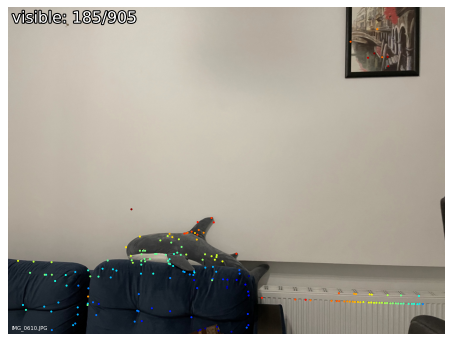

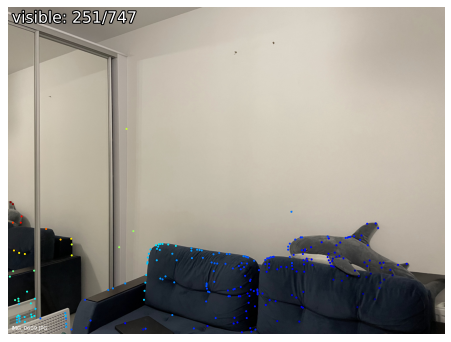

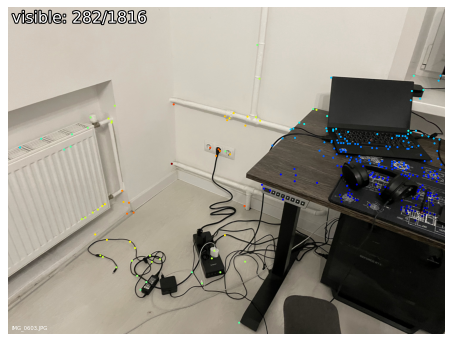

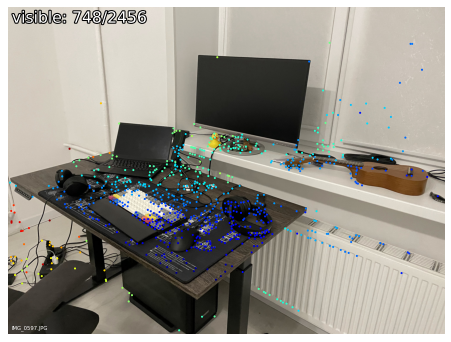

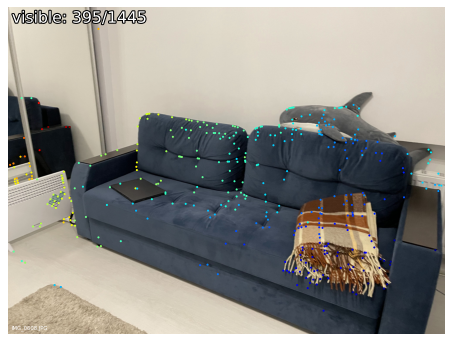

In [41]:
visualization.visualize_sfm_2d(sfm_dir, images, color_by='depth', n=10)

## Camera Intrinsics
Compare camera intrinsics figured by colmap with the original ones.

In [73]:
from hloc.utils.read_write_model import read_cameras_binary, read_images_binary

camera = read_cameras_binary(sfm_dir / 'cameras.bin')

{1: Camera(id=1, model='SIMPLE_RADIAL', width=4032, height=3024, params=array([3.04036058e+03, 2.01600000e+03, 1.51200000e+03, 2.07689151e-02]))}

In [36]:
camera_model = (camera.model, camera.width, camera.height, camera.params)

In [75]:
#TODO: right parameters for iphone camera

## Move all images that were not used by colmap to ***query***

In [27]:
import os 
import shutil 

colmap_images = read_images_binary(sfm_dir / 'images.bin')
database_list = [colmap_images[i].name for i in colmap_images] 

for image in os.listdir(images):
    if image not in database_list:
        shutil.move(images / image, query / image)
        
database_list = [f'database/{i}' for i in database_list] 
query_list = [f'query/{i}' for i in os.listdir(query)] # as queries could originally contain some pics

In [28]:
database_list_path = dataset / 'database_list.txt'
with open(str(database_list_path), 'w') as f:
    for i in database_list:
        f.write(str(i) + '\n')
        
query_list_path = dataset / 'query_list.txt'
with open(str(query_list_path), 'w') as f:
    for i in query_list:
        f.write(str(i) + '\n')

## Extract global features

In [16]:
global_feature_path = extract_features.main(global_feature_conf, dataset, outputs, \
                                               feature_path=Path(outputs, global_feature_conf['output']+'.h5'))

[12/17/2021 20:17:53 INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'global-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[12/17/2021 20:17:53 INFO] Found 68 images in root datasets/room.
[12/17/2021 20:17:53 INFO] Skipping the extraction.


## Generate localization pairs

In [29]:
from hloc import pairs_from_retrieval

pairs_from_retrieval.main(global_feature_path, 
                          loc_pairs, 40, 
                          query_list=query_list, 
                          db_list=database_list)

[12/17/2021 20:19:26 INFO] Extracting image pairs from a retrieval database.
[12/17/2021 20:19:26 INFO] Found 600 pairs.


## Extract local features for database and query images

In [30]:
local_feature_path = extract_features.main(local_feature_conf, dataset, outputs)

[12/17/2021 20:19:35 INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 4},
 'output': 'feats-superpoint-n4096-r1600',
 'preprocessing': {'grayscale': True, 'resize_max': 1600}}
[12/17/2021 20:19:35 INFO] Found 68 images in root datasets/room.
[12/17/2021 20:19:35 INFO] Skipping the extraction.


## Match the query images

In [34]:
match_path = match_features.main(matcher_conf, loc_pairs, local_feature_conf['output'], outputs)

[12/17/2021 20:25:47 INFO] Matching local features with configuration:
{'model': {'name': 'superglue', 'sinkhorn_iterations': 50, 'weights': 'indoor'},
 'output': 'matches-superglue'}
Loaded SuperGlue model ("indoor" weights)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 1823610.43it/s]

[12/17/2021 20:25:47 INFO] Finished exporting matches.


## Localize!

In [38]:
localize_sfm.main(
    sfm_dir,
    query_list_path,
    loc_pairs,
    local_feature_path,
    match_path,
    camera_model,
    results,
    covisibility_clustering=False)  # not required with SuperPoint+SuperGlue

[12/17/2021 20:27:37 INFO] Imported 15 images from query_list.txt
[12/17/2021 20:27:37 INFO] Reading 3D model...
[12/17/2021 20:27:37 INFO] Starting localization...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:02<00:00,  5.84it/s]

[12/17/2021 20:27:39 INFO] Localized 15 / 15 images.
[12/17/2021 20:27:39 INFO] Writing poses to outputs/room/room_hloc_superpoint+superglue_netvlad40.txt...
[12/17/2021 20:27:39 INFO] Writing logs to outputs/room/room_hloc_superpoint+superglue_netvlad40.txt_logs.pkl...
[12/17/2021 20:27:39 INFO] Done!


## Visualizing the localization


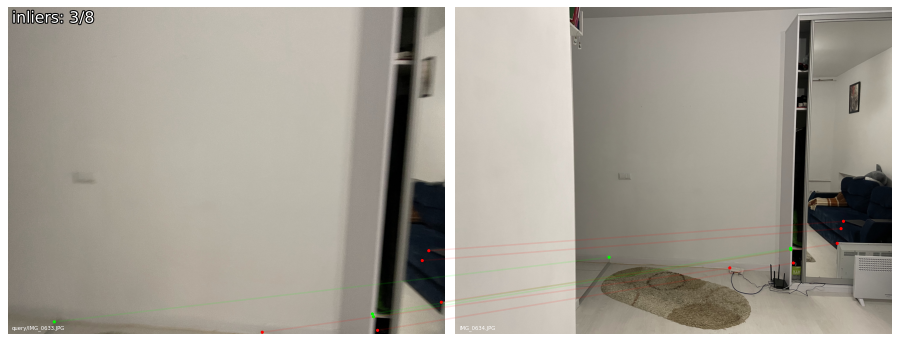

In [41]:
visualization.visualize_loc(
    results, dataset, sfm_dir, n=1, top_k_db=1, prefix='', seed=2)